# Indicator Variables

In [1]:
import pandas as pd
import numpy as np
import pickle

In [ ]:
Users = pd.read_csv('../../160-Stackoverflow-Data/train_test/Users.csv')

In [ ]:
Answers2012 = pd.read_csv('../../160-Stackoverflow-Data/train_test/Posts_Clean.csv')

In [ ]:
Users.head()

In [ ]:
Answers2012.head()

In [ ]:
Questions2012 = pd.read_csv('../../160-Stackoverflow-Data/train_test/X_train.csv')

In [ ]:
Questions2012.head()

In [ ]:
Users.loc[Users.Id == 2]

## User's account was created before a question being asked

In [ ]:
def before_question(user_id, question_id):
    return int(Users.loc[Users.Id == user_id]['CreationDate'] < Questions2012.loc[Questions2012.Id == question_id]['CreationDate'])  

## User has ever answered

In [ ]:
def ever_ans(user_id):
    return int(len(Answers2012.loc[Answers.OwnerUseId == user_id]) > 0 )

## User is active

In [ ]:
import datetime as dt

In [ ]:
def active(user_id, question_id):
    last_access = pd.to_datetime(Users.loc[Users.Id == user_id]['LastAccessDate'] )
    question_created = pd.Timestamp(Questions2012.loc[Questions2012.Id == question_id]['CreationDate'])
    if last_access >= question_created :
        return 1
    else:
        return int((question_created-last_access) <= dt.timedelta(days=3))

## residual color matrix

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors

In [10]:
rbg = {'GREEN': (0, 255, 0), 'CYAN': (0, 255, 255),'BLUE': (0, 128, 255), 'PURPLE': (127, 0, 255),
         'LIGHT_GREY': (224, 224, 224), 'ORANGE': (255, 128, 0), 'YELLOW': (255, 255, 0), 'RED': (255, 0, 0)}
colormap = {'base': {'label': 0, 'rgb': rbg['LIGHT_GREY']},
            'i_answer': {'label': 1, 'rgb': rbg['BLUE']},
            'i_comment': {'label': 2, 'rgb': rbg['CYAN']},
            'i_upvote': {'label': 3, 'rgb': rbg['GREEN']},
            'i_downvote': {'label': 4, 'rgb': rbg['RED']},
            'i_favorite': {'label': 5, 'rgb': rbg['YELLOW']},
            'i_edit': {'label': 6, 'rgb': rbg['PURPLE']}}

In [11]:
def residual_color_mat(mat):
    ca = []
    for x in colormap.keys():
        ca.append(list(colormap[x]['rgb']))
    colors = np.matrix(ca)/255 
    cmap = matplotlib.colors.ListedColormap(colors)
    norm = matplotlib.colors.BoundaryNorm(np.arange(len(ca)+1)-0.5, len(ca))

    plt.imshow(mat, cmap=cmap, norm=norm)
    plt.axis('off')
    cb = plt.colorbar(ticks=np.arange(len(ca)))
    cb.ax.set_yticklabels(colormap.keys())
    plt.title('Residual Color Matrix')
    plt.show()

In [34]:
# example
samp = np.array([[0,0,0,0,1,2,2,1,2,3],[1,2,2,0,0,1,2,2,1,2],[5,4,5,4,1,2,2,1,2,4]])
samp

array([[0, 0, 0, 0, 1, 2, 2, 1, 2, 3],
       [1, 2, 2, 0, 0, 1, 2, 2, 1, 2],
       [5, 4, 5, 4, 1, 2, 2, 1, 2, 4]])

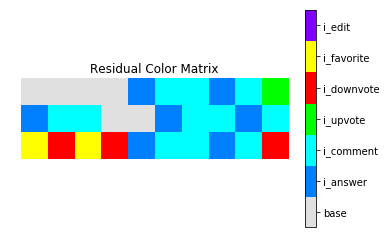

In [35]:
residual_color_mat(samp)

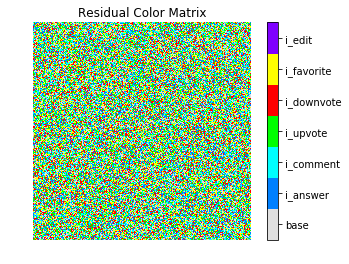

In [39]:
#plt.figure(figsize = (20,15))
residual_color_mat(np.random.randint(6, size=(250,250)))

## scatter plot

In [217]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

d= {0: {'i_answer': np.random.randint(100000,size=(1,30))[0], 'i_comment': np.random.randint(100000,size=(1,30))[0], 'i_upvote':[4534],'i_downvote':[43,3454,26345],'i_favorite':[],'i_edit':[]}, 
  1: {'i_answer': [14, 81346], 'i_comment': [81346, 81346, 81346],'i_edit':np.random.randint(100000,size=(1,30))[0]}, 
  2: {'i_answer': [5042], 'i_upvote':[4534],'i_comment': [],'i_favorite':[3,142]}, 
  3: {'i_answer': [], 'i_comment': [9, 57907, 57907, 57907, 14952, 9]}, 
  4: {'i_answer': [13283, 73], 'i_comment': [9, 73, 5649],'i_downvote':np.random.randint(100000,size=(1,30))[0]}, 
  5: {'i_answer': [], 'i_comment': np.random.randint(100000,size=(1,30))[0]},
  6: {'i_answer': [34,125], 'i_upvote':[],'i_favorite':[2345,65456]},
  7: {'i_answer': np.random.randint(100000,size=(1,10))[0], 'i_upvote':[54894],'i_comment': [],'i_edit':[46543]},
  8: {'i_answer': [], 'i_upvote':np.random.randint(100000,size=(1,30))[0],'i_comment': [],'i_favorite':np.random.randint(100000,size=(1,30))[0]},
  9: {'i_answer': [35,796,5042], 'i_upvote':[2],'i_comment': [354,6786,86665],'i_favorite':[2234]}}

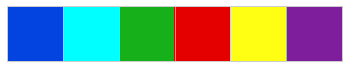

In [218]:
# colors with activities
col_list = ["blue", "cyan","green", 
            "red", "yellow","purple" ]
sns.palplot(sns.xkcd_palette(col_list))
col_list_palette = sns.xkcd_palette(col_list)
sns.set_palette(col_list_palette)

In [227]:
def residual_scatter_plot(d):
    flatted_d = []
    for question_i, activities in d.items():
        for activity, index_list in activities.items():
            for rank in index_list:
                flatted_d.append({'question_number': question_i, 'rank': rank, 'activity': activity})

    df = pd.DataFrame(flatted_d)
    scaler = MinMaxScaler()
    df['rank'] = scaler.fit_transform(df['rank'].values.reshape(-1,1))
 
    g = sns.lmplot('rank', 'question_number', data=df, hue='activity', fit_reg=False, palette = col_list_palette, 
                   markers = 's',scatter_kws={"s": 10})
    g.set(xticks=[])
    g.set(yticks=[])
    ax = plt.gca()
    ax.invert_yaxis()
    plt.gcf().suptitle("Residual Matrix")
    plt.show()

C:\Users\seungmi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


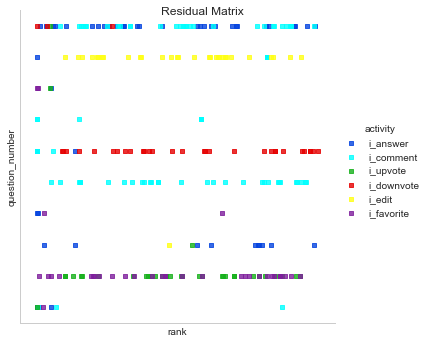

In [228]:
residual_scatter_plot(d)

In [3]:
import scipy.sparse as sps
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

In [4]:
def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbg='blue')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

C:\Users\seungmi\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


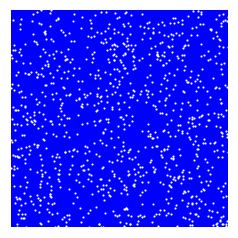

In [5]:
shape = (100000, 100000)
rows = np.int_(np.round_(shape[0]*np.random.random(1000)))
cols = np.int_(np.round_(shape[1]*np.random.random(1000)))
vals = np.ones_like(rows)

m = coo_matrix((vals, (rows, cols)), shape=shape)
ax = plot_coo_matrix(m)
plt.show()

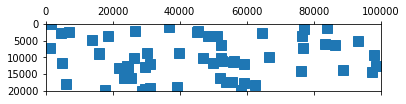

In [6]:
# csr matrix
A = sps.rand(20000,100000,density=0.00000003)
M = sps.csr_matrix(A)
plt.spy(M)
plt.show()

In [35]:
# sample
M = np.int32(np.zeros((100000,1000)))
rows = np.int_(np.round_(10000*np.random.random(100)))-1
cols = np.int_(np.round_(1000*np.random.random(100)))-1
vals = np.ones_like(rows)
for i in rows:
    for j in cols:
        M[i,j] = 1
aM = sps.coo_matrix(M)

In [36]:
plt.figure(figsize = (15,20))
ax = plot_coo_matrix(aM)
plt.show()

C:\Users\seungmi\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [27]:
aM

<100000x100 sparse matrix of type '<class 'numpy.int32'>'
	with 6400 stored elements in COOrdinate format>

In [10]:
m

<100000x100000 sparse matrix of type '<class 'numpy.int32'>'
	with 1000 stored elements in COOrdinate format>

In [12]:
np.int32(1)

1